# MLP
Mean RCI over 14 cell lines.

This notebook uses
lncRNA, canonical, yes tail-exclusion train, yes tail-exclusion test, -1 threshold, learning module, cross-validation.

There was a learning fail during CV.

In [1]:
SEED = 44
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 18:46:16.384425


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Mounted at /content/drive/
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = True
FILTER_TAILS_TRAIN  = True
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = True
FILTER_TAILS_TEST   = True
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 18:46:43.593273
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 4372
Num RCI: 4372
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 4372 sequences.

Training # 1 1
2023-04-29 18:46:53.332404
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 748:674 52.60%
Computed class weights: {0: 1.0548961424332344, 1: 0.9505347593582888}
Valid 1:0 174:169 50.73%
FIT


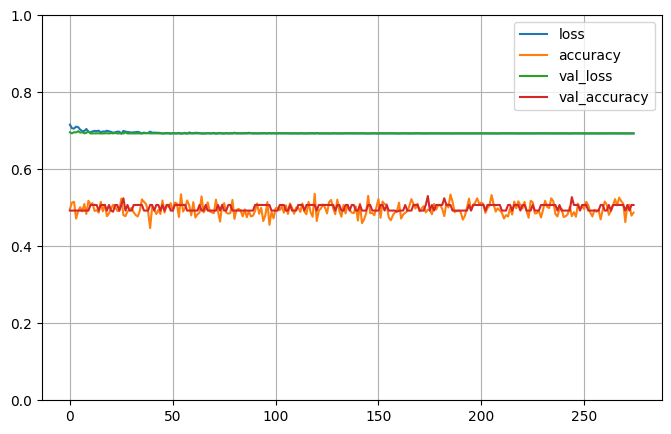


Testing # 1 1
2023-04-29 18:48:17.755093
PREDICT
Test 1:0 174:169 50.73%
Predict 1:0 43:300 12.54%
Test sizes (343, 1025) (343,)
Distrib of scores: 0.49997723 mean 2.26927e-05 std
Range of scores: 0.49991703 to 0.50004166
Score threshold 0.5
Confusion matrix
 [[154  15]
 [146  28]]
Normalized matrix
 [[0.44897959 0.04373178]
 [0.42565598 0.08163265]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


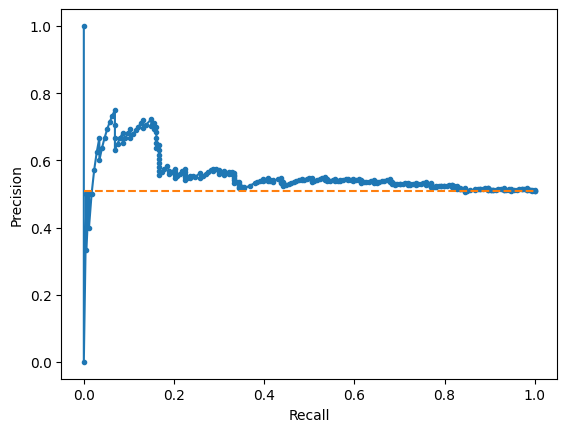

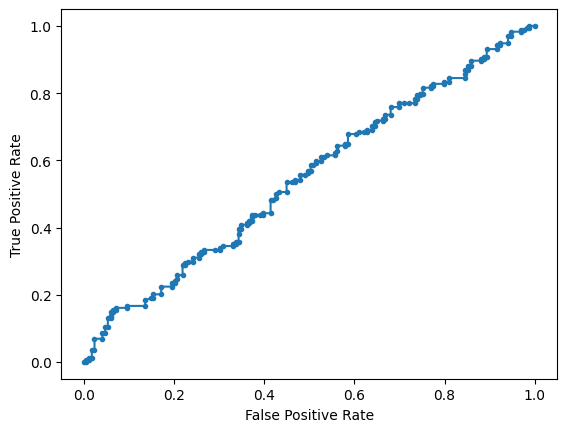

Accuracy: 53.06% Precision: 65.12% Recall: 16.09%
F1: 25.81% MCC: 0.1090
AUPRC: 55.36% AUROC: 54.81%
 accuracy [53.06122448979592]
 precision [65.11627906976744]
 recall [16.091954022988507]
 F1 [25.806451612903224]
 MCC [0.1089513329592991]
 AUPRC [55.36005900555458]
 AUROC [54.80854247432496]

Training # 1 2
2023-04-29 18:48:18.405129
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 741:692 51.71%
Computed class weights: {0: 1.0354046242774566, 1: 0.9669365721997301}
Valid 1:0 181:151 54.52%
FIT


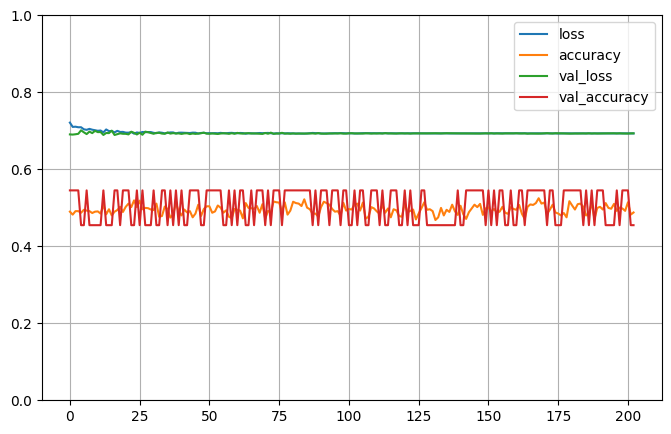


Testing # 1 2
2023-04-29 18:49:42.890616
PREDICT
Test 1:0 181:151 54.52%
Predict 1:0 332:0 100.00%
Test sizes (332, 1025) (332,)
Distrib of scores: 0.50107795 mean 8.568151e-06 std
Range of scores: 0.5010564 to 0.5011052
Score threshold 0.5
Confusion matrix
 [[  0 151]
 [  0 181]]
Normalized matrix
 [[0.         0.45481928]
 [0.         0.54518072]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


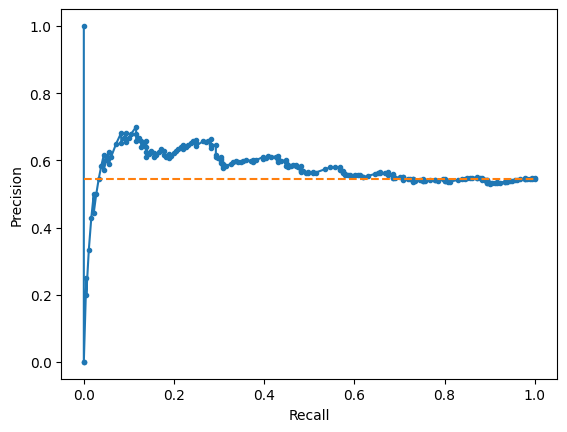

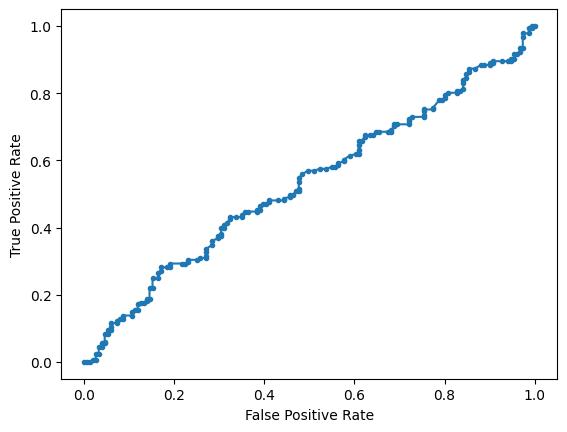

Accuracy: 54.52% Precision: 54.52% Recall: 100.00%
F1: 70.57% MCC: 0.0000
AUPRC: 57.61% AUROC: 53.18%
 accuracy [54.51807228915663]
 precision [54.51807228915663]
 recall [100.0]
 F1 [70.56530214424951]
 MCC [0.0]
 AUPRC [57.61278681756199]
 AUROC [53.175880867878966]

Training # 1 3
2023-04-29 18:49:44.122977
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 740:658 52.93%
Computed class weights: {0: 1.0623100303951367, 1: 0.9445945945945946}
Valid 1:0 182:185 49.59%
FIT


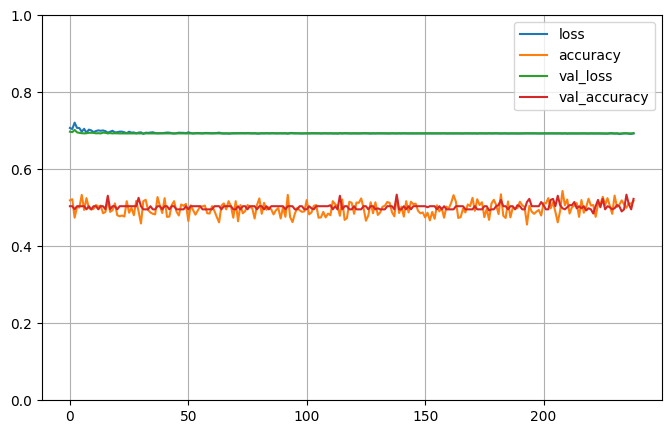


Testing # 1 3
2023-04-29 18:50:57.215882
PREDICT
Test 1:0 182:185 49.59%
Predict 1:0 337:30 91.83%
Test sizes (367, 1025) (367,)
Distrib of scores: 0.50012815 mean 0.00010189881 std
Range of scores: 0.49987465 to 0.5004862
Score threshold 0.5
Confusion matrix
 [[ 22 163]
 [  8 174]]
Normalized matrix
 [[0.0599455  0.44414169]
 [0.02179837 0.47411444]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


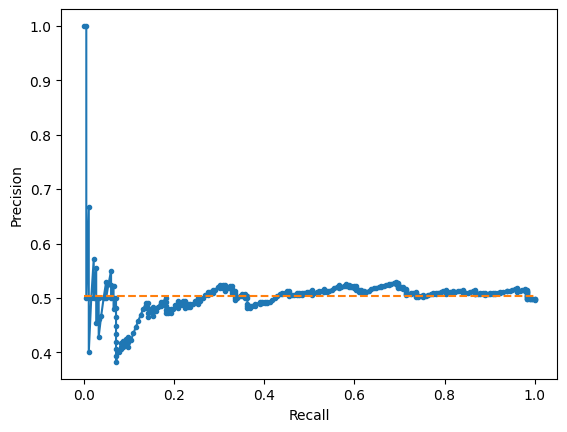

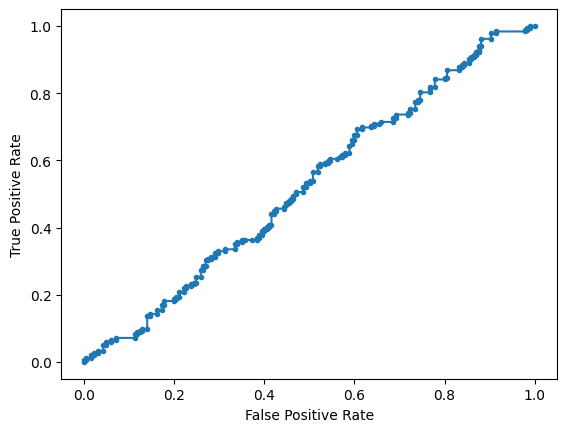

Accuracy: 53.41% Precision: 51.63% Recall: 95.60%
F1: 67.05% MCC: 0.1368
AUPRC: 50.44% AUROC: 52.37%
 accuracy [53.40599455040872]
 precision [51.632047477744806]
 recall [95.6043956043956]
 F1 [67.05202312138728]
 MCC [0.13680192689218265]
 AUPRC [50.44349690742595]
 AUROC [52.37451737451737]

Training # 1 4
2023-04-29 18:50:57.773504
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 714:679 51.26%
Computed class weights: {0: 1.0257731958762886, 1: 0.9754901960784313}
Valid 1:0 208:164 55.91%
FIT


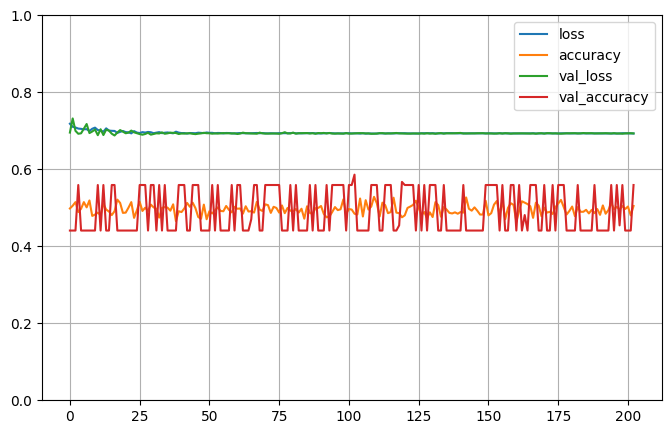


Testing # 1 4
2023-04-29 18:52:21.959847
PREDICT
Test 1:0 208:164 55.91%
Predict 1:0 288:84 77.42%
Test sizes (372, 1025) (372,)
Distrib of scores: 0.500017 mean 2.2723507e-05 std
Range of scores: 0.49996066 to 0.5001002
Score threshold 0.5
Confusion matrix
 [[ 47 117]
 [ 37 171]]
Normalized matrix
 [[0.12634409 0.31451613]
 [0.09946237 0.45967742]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


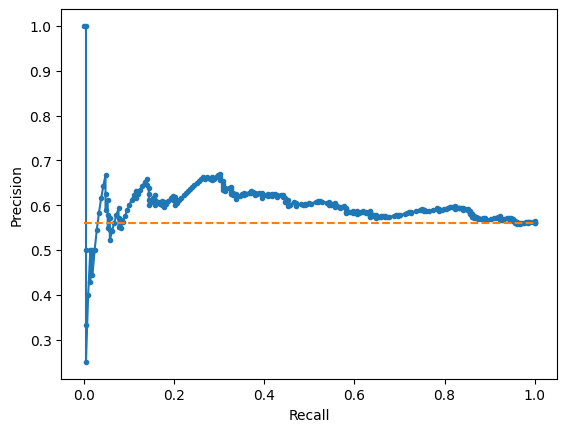

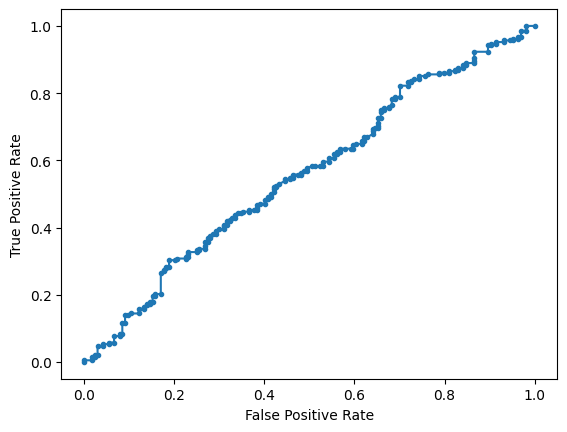

Accuracy: 58.60% Precision: 59.38% Recall: 82.21%
F1: 68.95% MCC: 0.1291
AUPRC: 59.84% AUROC: 55.97%
 accuracy [58.602150537634415]
 precision [59.375]
 recall [82.21153846153845]
 F1 [68.9516129032258]
 MCC [0.1290774113564696]
 AUPRC [59.83685623431072]
 AUROC [55.971505628517825]

Training # 1 5
2023-04-29 18:52:22.564514
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 745:669 52.69%
Computed class weights: {0: 1.0568011958146488, 1: 0.9489932885906041}
Valid 1:0 177:174 50.43%
FIT


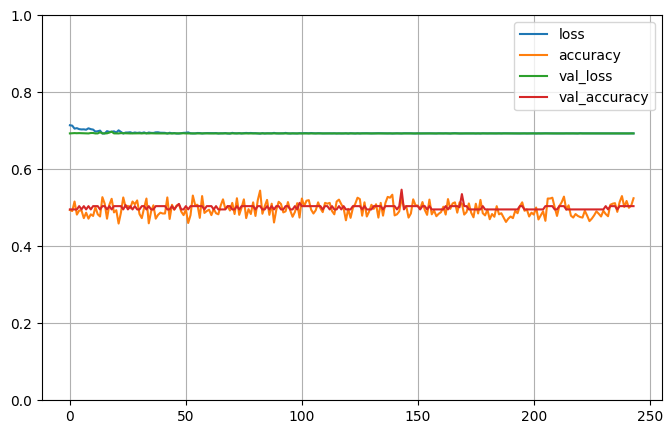


Testing # 1 5
2023-04-29 18:53:46.608299
PREDICT
Test 1:0 177:174 50.43%
Predict 1:0 218:133 62.11%
Test sizes (351, 1025) (351,)
Distrib of scores: 0.5000125 mean 3.6745147e-05 std
Range of scores: 0.49992839 to 0.5001651
Score threshold 0.5
Confusion matrix
 [[ 74 100]
 [ 59 118]]
Normalized matrix
 [[0.21082621 0.28490028]
 [0.16809117 0.33618234]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


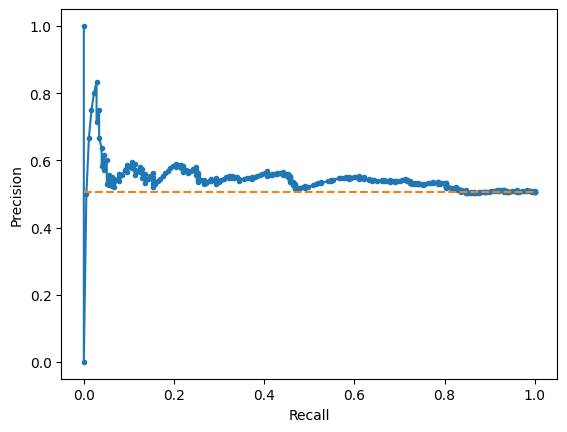

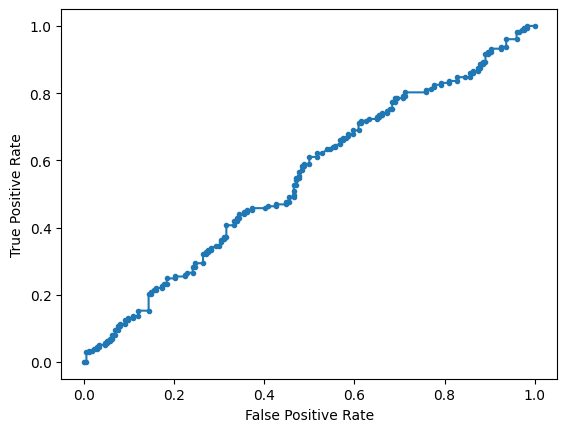

Accuracy: 54.70% Precision: 54.13% Recall: 66.67%
F1: 59.75% MCC: 0.0948
AUPRC: 54.35% AUROC: 54.87%
 accuracy [54.700854700854705]
 precision [54.12844036697248]
 recall [66.66666666666666]
 F1 [59.74683544303797]
 MCC [0.09477153707894874]
 AUPRC [54.34591857697176]
 AUROC [54.86882265082148]

Training # 2 1
2023-04-29 18:53:47.197732
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 747:660 53.09%
Computed class weights: {0: 1.065909090909091, 1: 0.9417670682730924}
Valid 1:0 175:183 48.88%
FIT


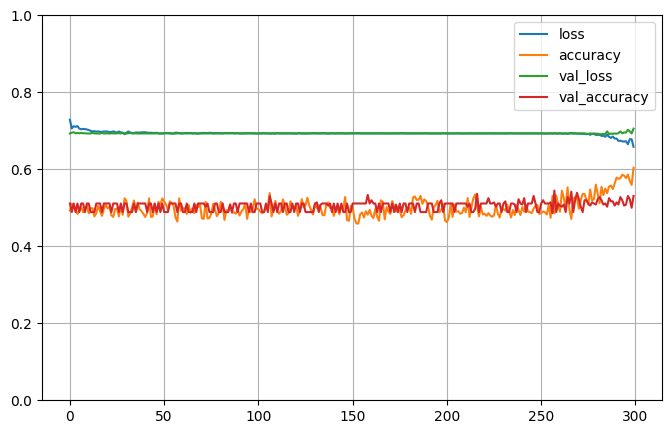


Testing # 2 1
2023-04-29 18:56:11.458977
PREDICT
Test 1:0 175:183 48.88%
Predict 1:0 289:69 80.73%
Test sizes (358, 1025) (358,)
Distrib of scores: 0.5596799 mean 0.06741746 std
Range of scores: 0.41394266 to 0.8219595
Score threshold 0.5
Confusion matrix
 [[ 42 141]
 [ 27 148]]
Normalized matrix
 [[0.11731844 0.39385475]
 [0.07541899 0.41340782]]
Extreme scores correct, pos:neg 22 0
Extreme scores incorrect pos:neg 16 0


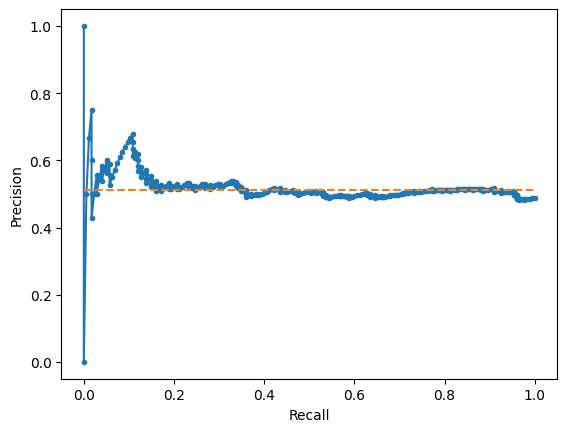

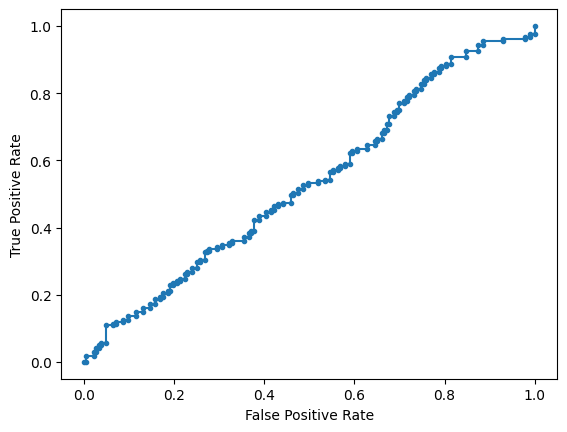

Accuracy: 53.07% Precision: 51.21% Recall: 84.57%
F1: 63.79% MCC: 0.0953
AUPRC: 51.73% AUROC: 53.42%
 accuracy [53.072625698324025]
 precision [51.21107266435986]
 recall [84.57142857142857]
 F1 [63.79310344827586]
 MCC [0.09532762300985151]
 AUPRC [51.73188668541913]
 AUROC [53.41764246682279]

Training # 2 2
2023-04-29 18:56:12.083425
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 751:675 52.66%
Computed class weights: {0: 1.0562962962962963, 1: 0.9494007989347537}
Valid 1:0 171:168 50.44%
FIT


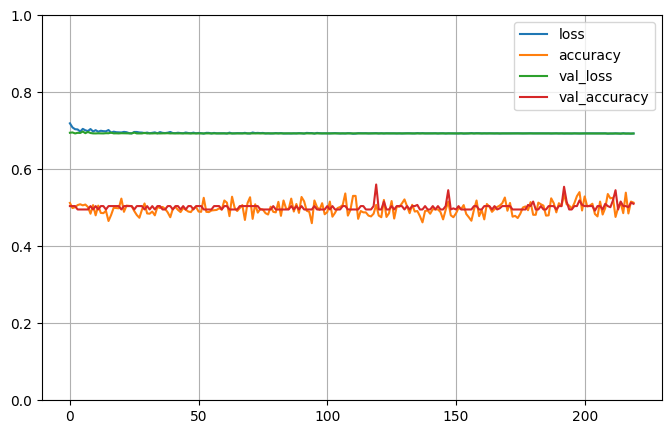


Testing # 2 2
2023-04-29 18:57:15.884087
PREDICT
Test 1:0 171:168 50.44%
Predict 1:0 156:183 46.02%
Test sizes (339, 1025) (339,)
Distrib of scores: 0.49999532 mean 0.000101552694 std
Range of scores: 0.49967164 to 0.5003565
Score threshold 0.5
Confusion matrix
 [[101  67]
 [ 82  89]]
Normalized matrix
 [[0.2979351  0.19764012]
 [0.24188791 0.26253687]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


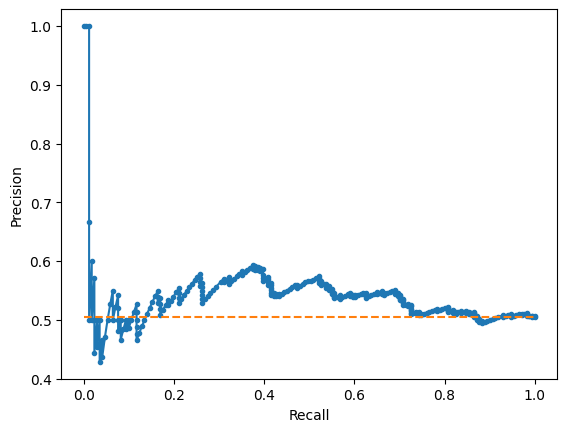

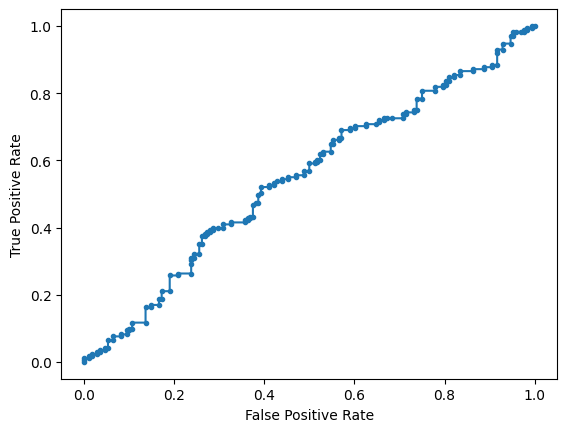

Accuracy: 56.05% Precision: 57.05% Recall: 52.05%
F1: 54.43% MCC: 0.1220
AUPRC: 53.85% AUROC: 54.73%
 accuracy [56.04719764011799]
 precision [57.05128205128205]
 recall [52.046783625730995]
 F1 [54.43425076452599]
 MCC [0.12204124796339597]
 AUPRC [53.85233785335413]
 AUROC [54.73405736563631]

Training # 2 3
2023-04-29 18:57:16.627042
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 721:686 51.24%
Computed class weights: {0: 1.0255102040816326, 1: 0.9757281553398058}
Valid 1:0 201:157 56.15%
FIT


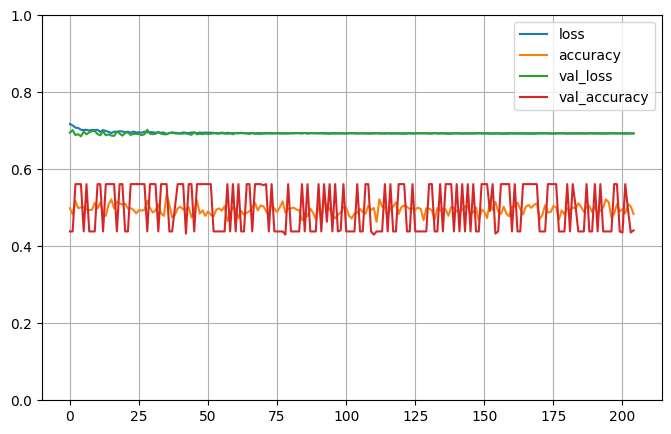


Testing # 2 3
2023-04-29 18:58:42.194883
PREDICT
Test 1:0 201:157 56.15%
Predict 1:0 358:0 100.00%
Test sizes (358, 1025) (358,)
Distrib of scores: 0.50122195 mean 5.01816e-05 std
Range of scores: 0.50110555 to 0.5014105
Score threshold 0.5
Confusion matrix
 [[  0 157]
 [  0 201]]
Normalized matrix
 [[0.         0.43854749]
 [0.         0.56145251]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


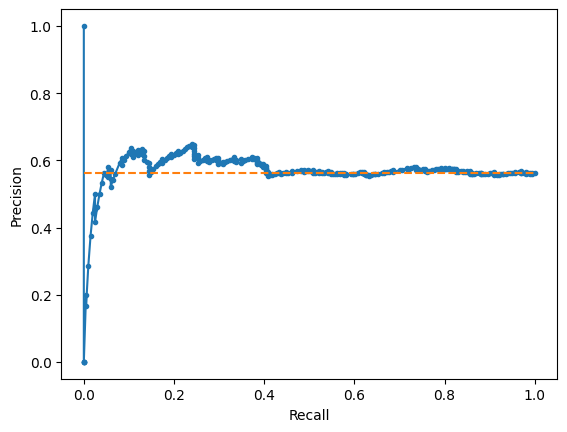

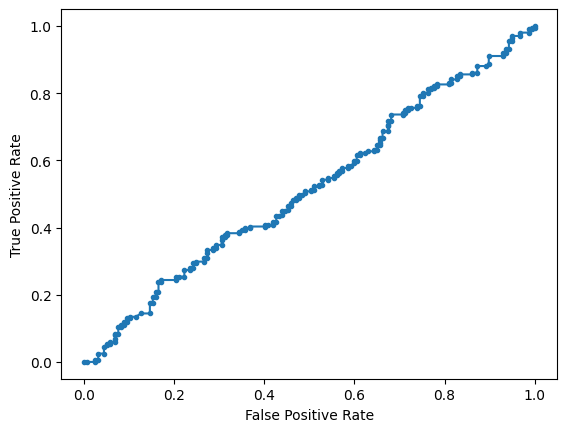

Accuracy: 56.15% Precision: 56.15% Recall: 100.00%
F1: 71.91% MCC: 0.0000
AUPRC: 57.03% AUROC: 51.79%
 accuracy [56.14525139664804]
 precision [56.14525139664804]
 recall [100.0]
 F1 [71.91413237924866]
 MCC [0.0]
 AUPRC [57.02782480057997]
 AUROC [51.7919954368286]

Training # 2 4
2023-04-29 18:58:42.851201
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 736:663 52.61%
Computed class weights: {0: 1.055052790346908, 1: 0.9504076086956522}
Valid 1:0 186:180 50.82%
FIT


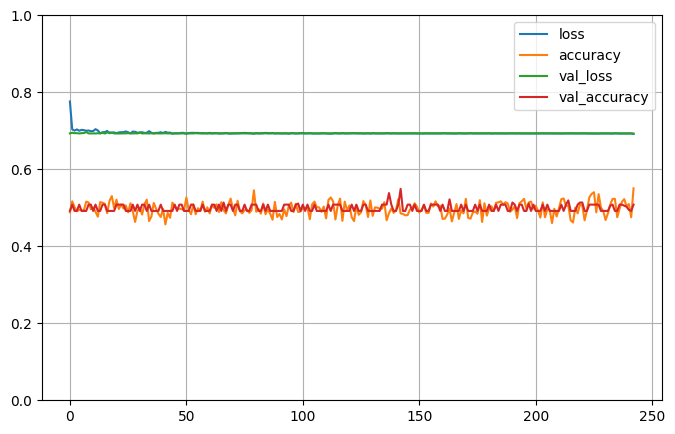


Testing # 2 4
2023-04-29 19:00:06.932081
PREDICT
Test 1:0 186:180 50.82%
Predict 1:0 239:127 65.30%
Test sizes (366, 1025) (366,)
Distrib of scores: 0.50003767 mean 9.5902564e-05 std
Range of scores: 0.4997999 to 0.5003468
Score threshold 0.5
Confusion matrix
 [[ 71 109]
 [ 56 130]]
Normalized matrix
 [[0.19398907 0.29781421]
 [0.15300546 0.35519126]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


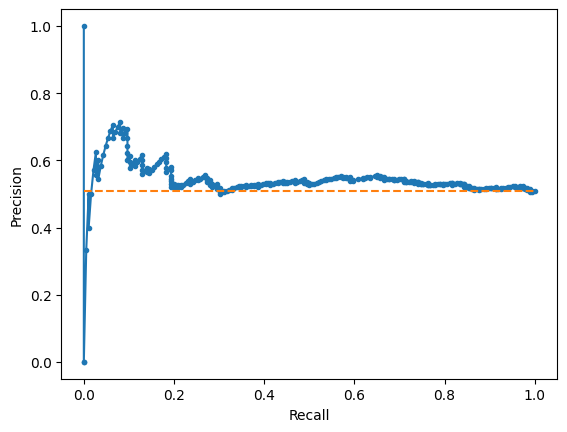

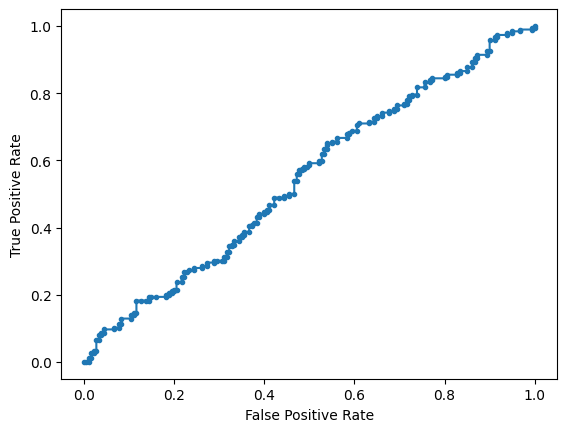

Accuracy: 54.92% Precision: 54.39% Recall: 69.89%
F1: 61.18% MCC: 0.0981
AUPRC: 54.26% AUROC: 54.59%
 accuracy [54.91803278688525]
 precision [54.39330543933054]
 recall [69.89247311827957]
 F1 [61.1764705882353]
 MCC [0.0980608013734932]
 AUPRC [54.264849263013716]
 AUROC [54.59229390681004]

Training # 2 5
2023-04-29 19:00:07.574833
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 733:688 51.58%
Computed class weights: {0: 1.032703488372093, 1: 0.9693042291950886}
Valid 1:0 189:155 54.94%
FIT


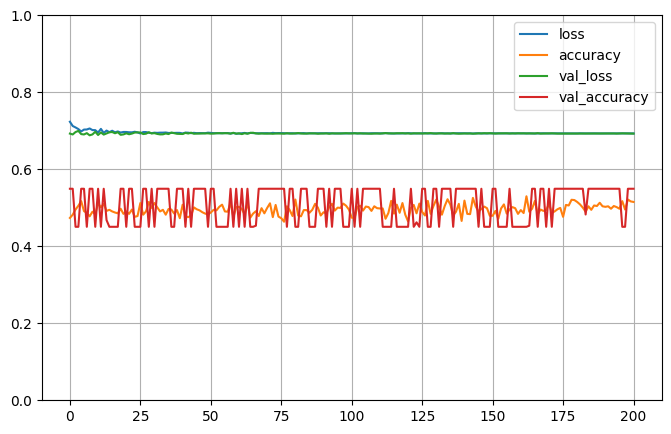


Testing # 2 5
2023-04-29 19:01:31.666142
PREDICT
Test 1:0 189:155 54.94%
Predict 1:0 344:0 100.00%
Test sizes (344, 1025) (344,)
Distrib of scores: 0.50052947 mean 1.5964746e-05 std
Range of scores: 0.50048256 to 0.5005787
Score threshold 0.5
Confusion matrix
 [[  0 155]
 [  0 189]]
Normalized matrix
 [[0.        0.4505814]
 [0.        0.5494186]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


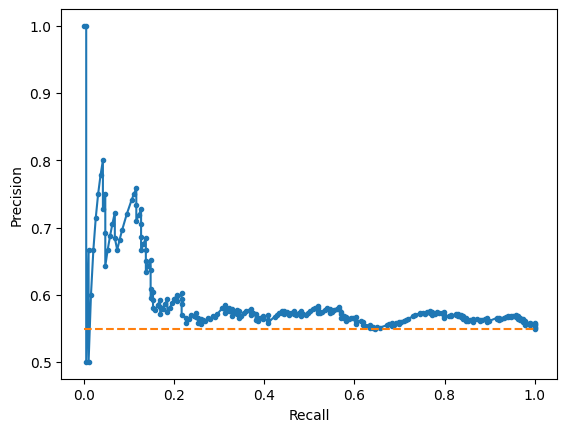

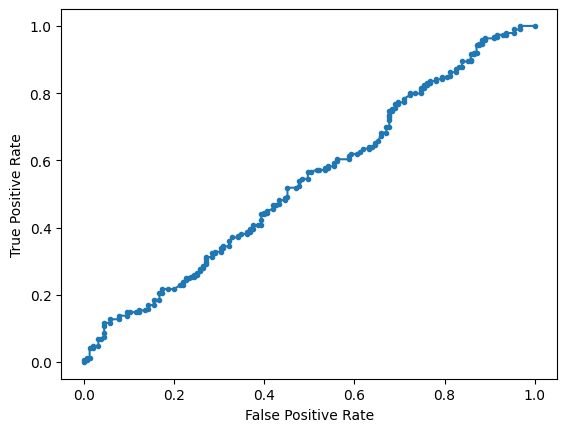

Accuracy: 54.94% Precision: 54.94% Recall: 100.00%
F1: 70.92% MCC: 0.0000
AUPRC: 58.87% AUROC: 53.79%
 accuracy [54.94186046511628]
 precision [54.94186046511628]
 recall [100.0]
 F1 [70.91932457786116]
 MCC [0.0]
 AUPRC [58.865366122148664]
 AUROC [53.79245605052056]
2023-04-29 19:01:32.233206


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 54.94% std 1.69
 precision mean 55.85% std 4.04
 recall mean 76.71% std 26.89
 F1 mean 61.44% std 13.74
 MCC mean 0.0785 std 0.0560
 AUPRC mean 55.33% std 3.02
 AUROC mean 53.95% std 1.28
 accuracy [[53.06122448979592], [54.51807228915663], [53.40599455040872], [58.602150537634415], [54.700854700854705], [53.072625698324025], [56.04719764011799], [56.14525139664804], [54.91803278688525], [54.94186046511628]]
 precision [[65.11627906976744], [54.51807228915663], [51.632047477744806], [59.375], [54.12844036697248], [51.21107266435986], [57.05128205128205], [56.14525139664804], [54.39330543933054], [54.94186046511628]]
 recall [[16.091954022988507], [100.0], [95.6043956043956], [82.21153846153845], [66.66666666666666], [84.57142857142857], [52.046783625730995], [100.0], [69.89247311827957], [100.0]]
 F1 [[25.806451612903224], [70.56530214424951], [67.05202312138728], [68.9516129032258], [59.74683544303797], [63.79310344827586], [54.43425076452599], [71.91413237924866], [61.